# Lab 3 : Working with Neural Networks

---


Total Points: **90**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs.

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.



In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Indian car selling platform data (say from TrueValue, CarDekho etc) for the regression problem, and for multi-class classification, we will consider Mute language Dataset. For Car Price prediction dataset refer attachted file -'train_set_CarMarketPlace.csv' and 'test_set_CarMarketPlace.csv'. For Mute disability Sign refer zip file attachted.


---



Section 1:  **(Total points = 40)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the car prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) **Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section**

1. Perform an exploratory analysis on the given dataset (train+test taken together). 
  1. Print the attribute names, values and label names and values.
  2. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute. 
  3. Plot a histogram indicating the distribution of different attributes in the dataset. \\
{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}  **(3 point)**
2. Perform data pre-processing operations like standardization and normalization.  Plot the histrograms again and note the change in histograms due to standarization. Also,  load train, test set into pandas dataframe.**(2 points)**

3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.  **( 10 points)**

4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(10 points)**

5. Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**

6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. **(5 points)**

7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Print the testing error. Comment on your overall observations. **(3+2 = 5 points)**

In [750]:
#Declaration Block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# Dataset
- This dataset is about the of price of used car based on different attributes like Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats.
- We will be using ANN technique to predict the price of the used car

In [751]:
# Loading the data

fileName_train = './train_set_CarMarketPlace.csv'
fileName_test = './test_set_CarMarketPlace.csv'

train_data = pd.read_csv(fileName_train, header=0)
test_data = pd.read_csv(fileName_test, header=0)

#Removing the blank row from dataframes
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Lexus,2019.0,20000.0,Petrol,Automatic,First,22.37,2487.0,214.56,5.0,5150000.0
1,Maruti,2013.0,80000.0,CNG,Manual,Second,32.52,998.0,58.33,5.0,270000.0
2,Tata,2017.0,70000.0,Diesel,Manual,First,19.09,1405.0,69.01,5.0,450000.0
3,Ford,2016.0,70000.0,Diesel,Manual,Second,25.83,1498.0,99.00,5.0,350000.0
4,Maruti,2016.0,81000.0,Diesel,Manual,Second,28.09,1248.0,88.50,5.0,650000.0
...,...,...,...,...,...,...,...,...,...,...,...
6319,Mahindra,2014.0,60000.0,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,750000.0
6320,Hyundai,2015.0,35000.0,Petrol,Manual,First,18.60,1197.0,81.83,5.0,600000.0
6321,Maruti,2018.0,35000.0,Diesel,Manual,First,28.40,1248.0,74.02,5.0,800000.0
6322,Renault,2016.0,44000.0,Petrol,Manual,First,25.17,799.0,53.30,5.0,270000.0


In [752]:
''' Priting the attribute name along with the data type of each attribute and values it can take '''
attributes = train_data.columns.values
for attribute in attributes:
    if train_data[attribute].dtype == object:
        print("Attribute name: {}, Values: {}".format(attribute, train_data[attribute].unique()))
    else:
        print("Attribute name: {}, Data type: {}".format(attribute, train_data[attribute].dtype))

Attribute name: Company, Values: ['Lexus' 'Maruti' 'Tata' 'Ford' 'Honda' 'Mahindra' 'Renault' 'Hyundai'
 'Volvo' 'BMW' 'Skoda' 'Nissan' 'Chevrolet' 'Jeep' 'Volkswagen' 'Toyota'
 'Fiat' 'Land' 'Mitsubishi' 'Audi' 'Mercedes' 'Jaguar' 'Datsun'
 'Ambassador' 'Force' 'MG' 'Ashok' 'Isuzu' 'Daewoo' 'Opel' 'Kia']
Attribute name: Model, Data type: float64
Attribute name: Odometer reading, Data type: float64
Attribute name: fuel, Values: ['Petrol' 'CNG' 'Diesel' 'LPG']
Attribute name: transmission, Values: ['Automatic' 'Manual']
Attribute name: owner, Values: ['First' 'Second' 'Third' 'Fourth']
Attribute name: mileage, Data type: float64
Attribute name: engine, Data type: float64
Attribute name: max_power, Data type: float64
Attribute name: seats, Data type: float64
Attribute name: Price, Data type: float64


In [753]:
''' Printing the minimum, maximum, mean and standard deviation of each attribute '''
stats = train_data.describe()
stats

,Model,Odometer reading,mileage,engine,max_power,seats,Price
count,6320.000000,6.320000e+03,6320.000000,6320.000000,6320.000000,6320.000000,6.320000e+03
mean,2013.976582,6.814105e+04,19.387541,1453.268038,91.413369,5.406013,6.457182e+05
std,3.881178,5.561126e+04,4.049740,502.544072,35.836349,0.954924,8.028579e+05
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04
25%,2012.000000,3.300000e+04,16.780000,1197.000000,68.050000,5.000000,2.700000e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,4.500000e+05
75%,2017.000000,9.100000e+04,22.300000,1582.000000,102.000000,5.000000,6.930000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


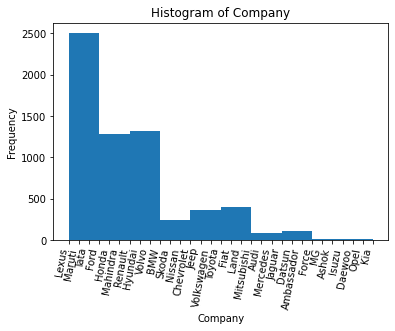

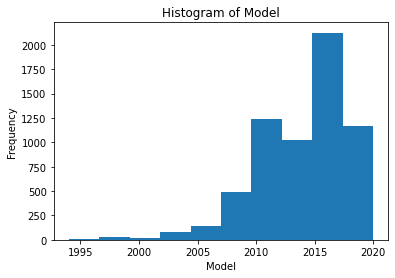

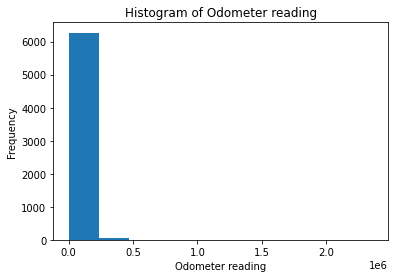

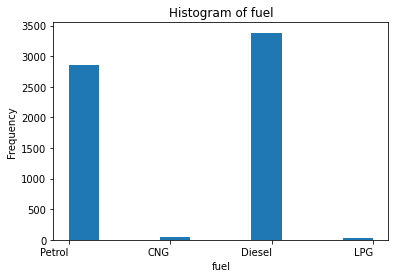

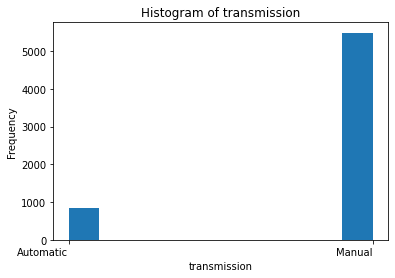

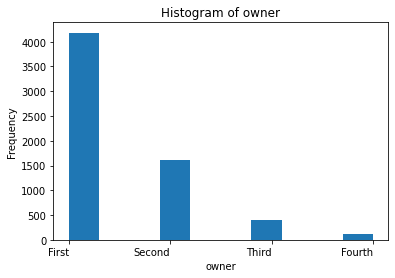

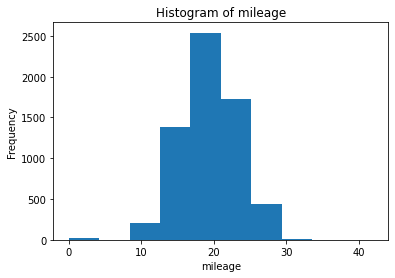

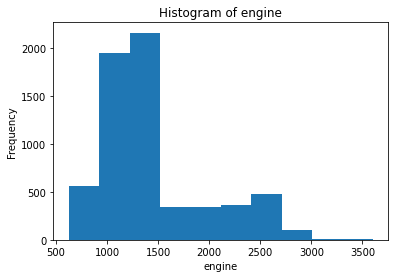

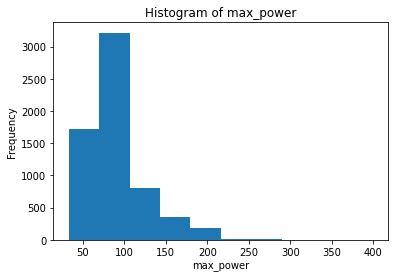

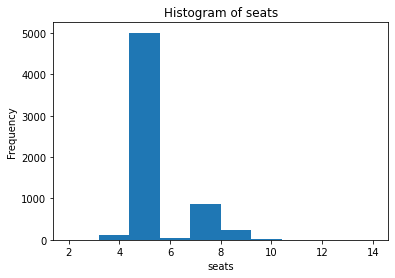

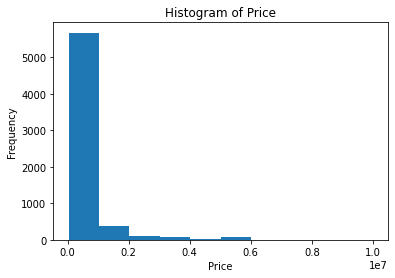

In [754]:
''' Histogram for distribution of each attribute '''
def getRotationValue(numAttribute):
    if numAttribute<10:
        return 0
    return 80
def plotHistogram(train_data, attributes):
    for attribute in attributes:
        if train_data[attribute].dtype != object:
            plt.hist(train_data[attribute])
            plt.title('Histogram of ' + attribute)
            plt.xlabel(attribute)
            plt.ylabel('Frequency')
            plt.show()
        else:
            plt.hist(train_data[attribute], bins=10)
            plt.xlabel(attribute)
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + attribute)
            plt.setp(plt.gca().get_xticklabels(), rotation=getRotationValue(
                len(train_data[attribute].unique())),
                    horizontalalignment='right')
            plt.show()
plotHistogram(train_data, attributes)

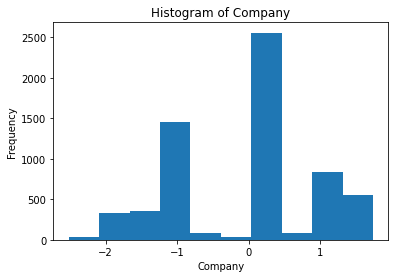

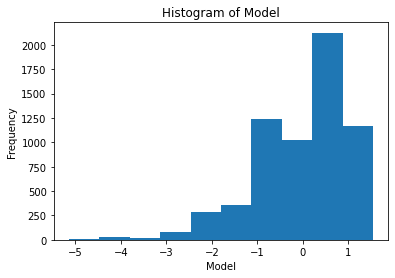

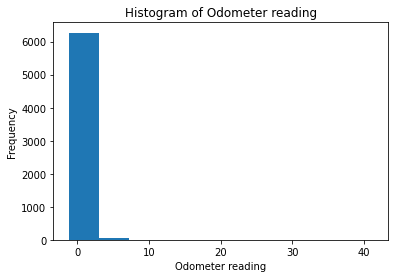

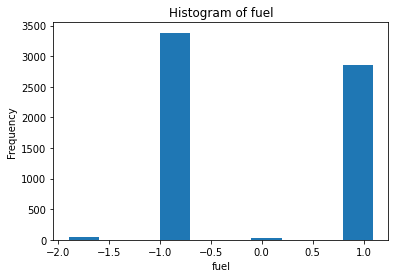

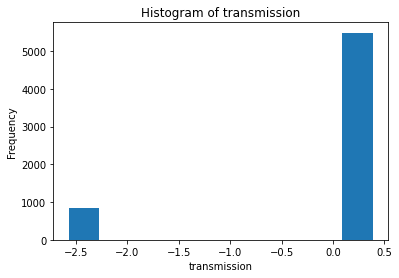

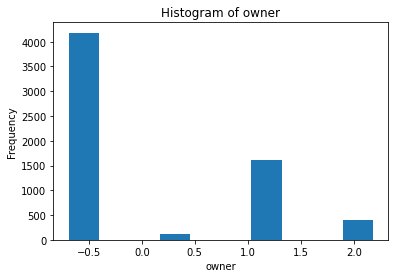

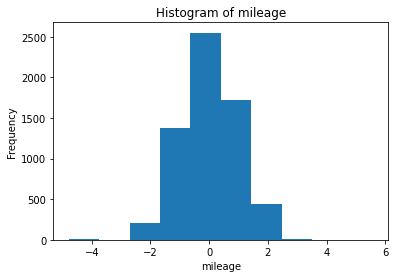

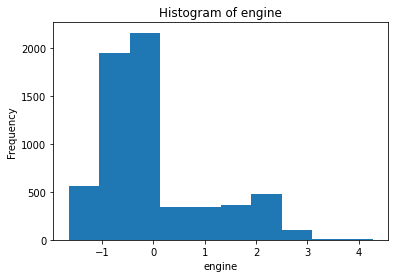

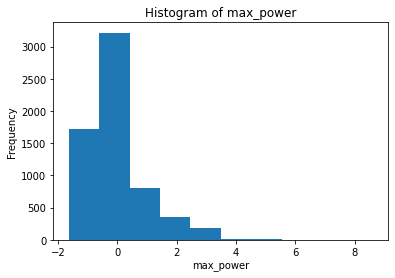

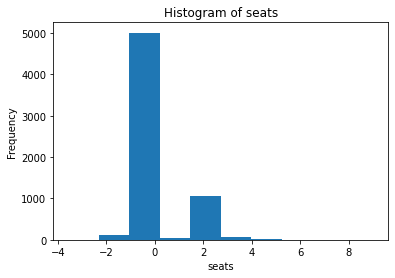

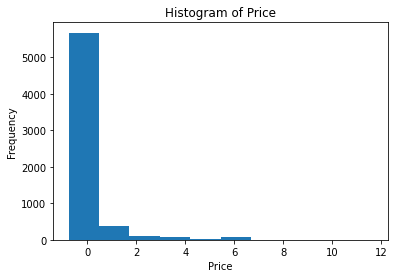

In [755]:
''' Standardizing the data after mapping the categorical data to numerical data '''
for attribute in attributes:
    if train_data[attribute].dtype == object:
        train_data[attribute] = train_data[attribute].astype('category')
        train_data[attribute] = train_data[attribute].cat.codes
        test_data[attribute] = test_data[attribute].astype('category')
        test_data[attribute] = test_data[attribute].cat.codes
train_data = (train_data - train_data.mean()) / train_data.std()
test_data = (test_data - test_data.mean()) / test_data.std()
plotHistogram(train_data, attributes)

- The histogram obtained has the same frequency distribution as present in the original dataset. But the x values are now small. For categorial data, the order of values may not be same. That is why it may look like the histograms are not same. But the frequency distribution is still the same

In [756]:
''' Calculating the correlation between the attributes and price to check importance of each attribute '''
stats = train_data.describe()
stats = stats.transpose()
stats['correlation'] = np.corrcoef(train_data.transpose())[-1]
stats

,count,mean,std,min,25%,50%,75%,max,correlation
Company,6320.0,-1.450317e-16,1.0,-2.517589,-0.957031,0.319789,0.319789,1.738477,-0.090282
Model,6320.0,2.416520e-14,1.0,-5.147041,-0.509274,0.263687,0.778995,1.551956,0.410813
Odometer reading,6320.0,1.146762e-16,1.0,-1.225292,-0.631905,-0.146392,0.411049,41.220358,-0.218224
fuel,6320.0,1.037145e-16,1.0,-1.893798,-0.898057,-0.898057,1.093424,1.093424,-0.195912
transmission,6320.0,1.450317e-16,1.0,-2.571655,0.388793,0.388793,0.388793,0.388793,-0.585332
owner,6320.0,3.429043e-17,1.0,-0.689066,-0.689066,-0.689066,1.223914,2.180404,-0.240073
mileage,6320.0,-3.260402e-16,1.0,-4.787354,-0.643879,-0.021616,0.719172,5.583681,-0.118027
engine,6320.0,1.621769e-16,1.0,-1.650140,-0.509941,-0.408458,0.256161,4.279688,0.463825
max_power,6320.0,2.923119e-17,1.0,-1.635584,-0.651946,-0.262677,0.295416,8.610995,0.752830
seats,6320.0,2.372223e-16,1.0,-3.566788,-0.425178,-0.425178,-0.425178,8.999654,0.047853


In [757]:
# We will perform customized forward and backward propagation



# Define Abstract class
class Layer():
  def __init__(self, numNeurons:int, numInputs:int):
    self.numNeurons = numNeurons
    self.numInputs = numInputs
    self.weights = np.random.randn(numNeurons, numInputs)
    self.bias = np.random.randn(numNeurons)
    self.output = None
    self.input = None
    self.delta = np.zeros((numNeurons, 1))

# Define Fully connected Layer
class FCLayer(Layer):

  # Forward Propagation
  def forward(self, input):
    self.input = input
    self.output = input @ self.weights.transpose() + self.bias.transpose()
    return self.output
  # Backward Propagation
  def backward(self, delta, learningRate):
    self.delta =  delta@self.weights
    self.gradweights = np.zeros((self.numNeurons, self.numInputs))
    for i in range(self.input.shape[0]):
      currentDelta = np.reshape(delta[i], (delta[i].shape[0], 1))
      currentInput = np.reshape(self.input[i], (self.input[i].shape[0], 1))
      self.gradweights = self.gradweights + currentDelta @ currentInput.transpose()
    self.gradbias=np.sum(delta, axis=0)
    self.weights = self.weights - learningRate * (self.gradweights/delta.shape[0])
    self.bias = self.bias - learningRate * (self.gradbias/delta.shape[0])
    return self.delta


# Activation Layer (ReLU) 
class ActivationLayer(Layer):
  def __init__(self, activation_function, activation_function_derivative):
    self.activation_function = activation_function
    self.activation_function_derivative = activation_function_derivative
    self.output = None
  # Forward Propagation
  def forward(self, input):
    self.input = input
    self.output = self.activation_function(input)
    return self.output
    # Backward Propagation
  def backward(self, delta, learningRate):
    gradient = delta* self.activation_function_derivative(self.input)
    return gradient

# Define activation function and its derivative
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))
def tanh(x):
  return np.tanh(x)
def tanh_derivative(x):
  return 1.0 - x**2
def relu(x):
  return np.maximum(0,x)
def relu_derivative(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x
def leaky_relu(x):
  return np.maximum(0.01*x,x)
def leaky_relu_derivative(x):
  x[x<=0] = 0.01
  x[x>0] = 1
  return x



In [758]:
# Define Loss function (Use mean square error)
def square_loss_function(yPred, yTrue):
  loss = 0
  for i in range(len(yPred)):
    loss +=np.sum(np.square(yPred[i] - yTrue[i]))
  return loss/yPred.shape[0]
    
def square_loss_function_derivative(yPred, yTrue):
  return (yPred - yTrue)

In [759]:
# Implement Backpropagation

class ANN():
    ''' Creates ANN object with the given parameters'''
    def __init__(self, layerSizeList:list,
                 activation_function, 
                 activation_function_derivative, 
                 loss_function, 
                 loss_function_derivative,
                 X, 
                 Y, 
                 batch_size=1):
        self.layers = []
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        self.loss_function = loss_function
        self.batch_size = batch_size
        self.loss_function_derivative = loss_function_derivative
        self.X = X
        self.Y = Y
        self.trained = False
        for i in range(len(layerSizeList)-1):
            self.layers.append(FCLayer(layerSizeList[i+1], layerSizeList[i]))
            self.layers.append(ActivationLayer(activation_function, activation_function_derivative))
    
    ''' Performs forward propagation on the given input '''
    def __forward(self, input):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    ''' Performs backward propagation on the given input '''
    def __backward(self, delta, learning_rate):
        for layer in reversed(self.layers):
            delta = layer.backward(delta, learning_rate)
    
    ''' Trains the ANN with the given parameters '''
    def train(self, epochs = 100000, learning_rate = 0.1):
        num_batches = int(self.X.shape[0]/self.batch_size)
        for epoch in range(epochs):
            for i in range(0,num_batches, self.batch_size):
                X_batch = self.X[i:i+self.batch_size, :]
                Y_batch = self.Y[i:i+self.batch_size, :]
                yPred = self.__forward(X_batch)
                delta = self.loss_function_derivative(yPred, Y_batch)
                self.__backward(delta, learning_rate)
        self.trained = True
                
    ''' Predicts the output for the given input '''
    def predict(self, X):
        if not self.trained:
            raise Exception("Model not trained yet. Please train the model first.")
        return self.__forward(X)
    
    ''' Calculates the loss on the training data'''
    def get_train_loss(self):
        if not self.trained:
            raise Exception("Model not trained yet. Please train the model first.")
        return self.loss_function(self.predict(self.X), self.Y)
    
    ''' Calculates the loss on the given test data'''
    def get_test_loss(self, X, Y):
        if not self.trained:
            raise Exception("Model not trained yet. Please train the model first.")
        return self.loss_function(self.predict(X), Y)
    
    

No. of Epochs: 1, Batch Loss: 2.094338299293577, Stocastic Loss: 0.2949607135749692
No. of Epochs: 10, Batch Loss: 1.9851561036005128, Stocastic Loss: 0.17273202774735513
No. of Epochs: 100, Batch Loss: 1.3529409982081875, Stocastic Loss: 0.13565746943958046
No. of Epochs: 1000, Batch Loss: 0.5701079033041537, Stocastic Loss: 0.13740906250707477
Test Loss by Batch ANN = 0.4847301810743047
Test loss by Stocastic ANN = 0.15184338184581056


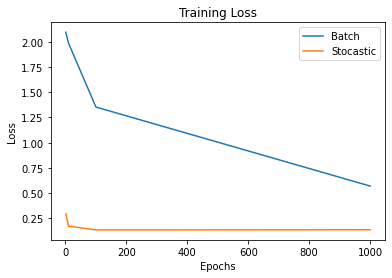

In [760]:
# Training Network
LEARNING_RATE = 0.001
X = train_data.drop('Price', axis=1).values
Y = train_data.drop(train_data.columns.difference(['Price']), axis=1).values
X_test = test_data.drop('Price', axis=1).values
Y_test = test_data.drop(test_data.columns.difference(['Price']), axis=1).values
batch_ann = ANN([X.shape[1], 15, 1], leaky_relu, leaky_relu_derivative, square_loss_function, square_loss_function_derivative, X, Y, batch_size=X.shape[0])
stocastic_ann = ANN([X.shape[1], 15, 1], leaky_relu, leaky_relu_derivative, square_loss_function, square_loss_function_derivative, X, Y, batch_size=1)
errors_batch = []
errors_stocastic = []
epochsList = [1, 9, 90, 900]
cumEpoch = 0
for epochs in epochsList:
    batch_ann.train(epochs, LEARNING_RATE)
    stocastic_ann.train(epochs, LEARNING_RATE)
    errors_batch.append(batch_ann.get_train_loss())
    errors_stocastic.append(stocastic_ann.get_train_loss())
    print('No. of Epochs: {}, Batch Loss: {}, Stocastic Loss: {}'.format(cumEpoch+epochs, errors_batch[-1], errors_stocastic[-1]))
    cumEpoch+= epochs
for i in range(1, len(epochsList)):
    epochsList[i] = epochsList[i-1] + epochsList[i]
print('Test Loss by Batch ANN = {}'.format(batch_ann.get_test_loss(X_test, Y_test)))
print('Test loss by Stocastic ANN = {}'.format(stocastic_ann.get_test_loss(X_test, Y_test)))
plt.plot(epochsList, errors_batch, label='Batch')
plt.plot(epochsList, errors_stocastic, label='Stocastic')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Hyperparameters

- The suitable learning rate is found to be 0.001 by trail and error(On higher values, there were overflows). 
- The activation function chosen is leaky relu because it is best suited for regression. The loss on different methods is mentioned in the above cell.

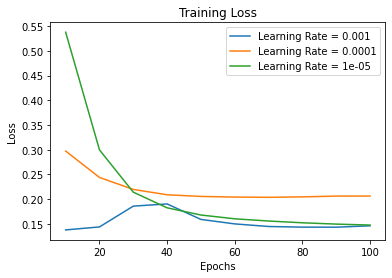

In [764]:
''' Training the model by best method for different rates'''
NUM_TRAINS = 10
EPOCH_PER_TRAIN = 10
learning_rates = [ 0.001, 0.0005, 0.0001, 0.00005]
test_losses = []
for learning_rate in learning_rates:
    stocastic_ann = ANN([X.shape[1], 15, 1], leaky_relu, leaky_relu_derivative, square_loss_function, square_loss_function_derivative,
                    X, Y, batch_size=1) #This method performed best in the above experiment
    training_loss = []
    for i in range(NUM_TRAINS):
        stocastic_ann.train(EPOCH_PER_TRAIN, learning_rate)
        training_loss.append(stocastic_ann.get_train_loss())
    test_losses.append(stocastic_ann.get_test_loss(X_test, Y_test))
    plt.plot([i*EPOCH_PER_TRAIN for i in range(1,NUM_TRAINS+1)], training_loss, label='Learning Rate = {}'.format(learning_rate))
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

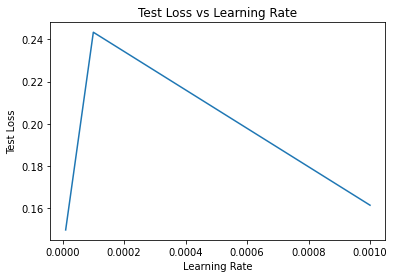

Best Test error obtained = 0.14966834872647047


In [765]:
# Plots
''' Loss vs Learning Rate '''
plt.plot(learning_rates, test_losses)
plt.title('Test Loss vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')
plt.show()
print('Best Test error obtained = {}'.format(min(test_losses)))

# Challenges and Observations
- Relu activation function works best with this kind of problem.
- In this dataset, the stochastic gradient descent is better than batch gradient descent.
- The accuracy is more when the learning rate is low.
- The stochastic gradient descent converges faster than batch gradient descent.
- On, higher learning rates, the model is not able to converge. The loss is increasing with epochs.
- Artificial Neural Networks are quite slow to train. The training time is more than 10 minutes.


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Mute signs using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each class. **(2 points)**

2. Plot the distribution of number of images in each class. Is the distribution uniform? Comment. **(2+1 points)**

3. Process the dataset through the [Canny Edge detection](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) and display the feature map for one example from each class. **(5 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(7 points)**
*  Input layer
*  Con2D with 32 neurons 3x3 kernals and ReLU activation. 
*  Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization. 
*  Max Pooling layer with pool-size 2x2 and padding as 'valid'. 
*  Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
*  Con2D with 24 neurons 3x3 kernals and ReLU activation. 
*  Batch normalization
*  Max Pooling layer with size 2x2 and 'valid' as padding
*  Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2. 
*  Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
*  Max Pooling layer with size 2x2 and 'valid' as padding.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Dropout of 30% ie. 0.3 
*  Global Average pooling 2D layer
*  Fully Connected Dense Layer with number of classes neurons and softmax activation.

3. Implement using cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. Bonus points for custom implementation of cross entropy loss function. **(5 points + 5 bonus points)**

4. Compile and train your model with four different optimizers viz. SGD,
RMSprop, Adam,\& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**. Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model. **(3points)**.

   NOTE: You can try to find best learning rate from following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**



In [ ]:
# import Sign dataset
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)

ModuleNotFoundError: No module named 'keras'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



In [ ]:
#load dataset
#Creating data generators



#creating flow from directory for the generators created above

In [ ]:
#Dataset Exploration

In [ ]:
# Model Structure 




In [ ]:
# Implement the loss (cross-entropy)

In [ ]:
# Compile and fit the model

In [ ]:
# Test the model

In [ ]:
# Plots

In [ ]:
# Challenges and observations